In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

torch.normal       mean 0.0002241074 std 0.9937243462
torch.randn        mean 0.0028839631 std 1.0009776354
np.random.normal   mean 0.0083413009 std 0.9951043910


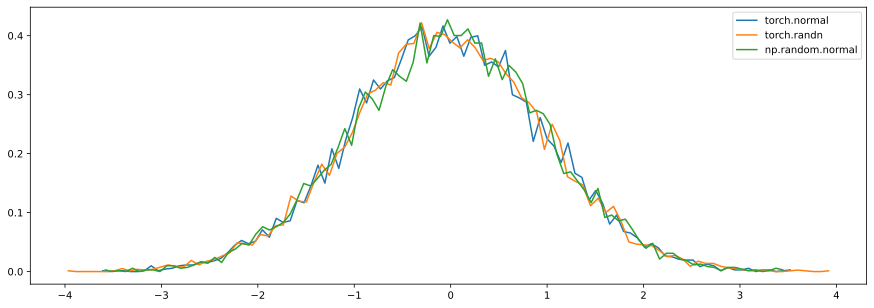

In [21]:
a = torch.normal(0, 1, (10000,))
b = torch.randn(10000)
c = torch.from_numpy(np.random.normal(0, 1, 10000))
data = {
    'torch.normal':a,
    'torch.randn':b,
    'np.random.normal':c
}


# plot the distribution of 3 function
p = plt.figure(figsize=(15,5))
for na, da in data.items():
    print(f"{na:18s} mean {da.mean():.10f} std {da.std():.10f}")
    hy, hx = torch.histogram(da, density=True)
    plt.plot(hx.detach()[:-1], hy, label=na)
    plt.legend()
plt.show()

In [22]:
# Create manual dataset
# y = w1x1 + w2x2 + b
torch.manual_seed(42)
num_inputs = 2
num_examples = 1000

true_w, true_b = [2, -3.4], 4.2 # true parameters
features = torch.randn(num_examples, num_inputs, dtype=torch.float) # 
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.normal(0, 0.01, labels.shape)   # add meaningless noise to dataset

print(features.shape, labels.shape)

torch.Size([1000, 2]) torch.Size([1000])


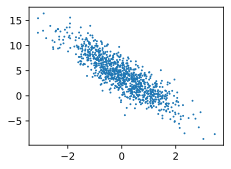

In [23]:
# show the relationship between labels and features
from d2lzh_pytorch import set_figsize

set_figsize()
plt.scatter(features[:, 1], labels, 1)
plt.show()

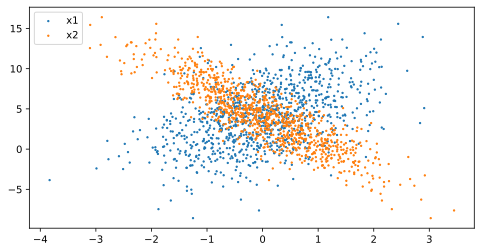

In [24]:
# my own code
p = plt.figure(figsize=(8, 4))
plt.scatter(features[:, 0], labels, 2, label='x1')
plt.scatter(features[:, 1], labels, 2, label='x2')
plt.legend()
plt.show()

In [25]:
from d2lzh_pytorch import data_iter

batch_size = 12
for X, y in data_iter(batch_size, features, labels):
    print(X)
    print(y)
    break

tensor([[ 0.8521, -1.6947],
        [-0.9665,  0.3677],
        [-0.9953, -0.2994],
        [ 0.7200,  0.4114],
        [ 1.0103,  0.6110],
        [ 0.6105,  1.3347],
        [-0.2296, -0.4071],
        [-0.2498,  0.2240],
        [-0.5404,  1.2410],
        [-0.5000, -0.5501],
        [-1.2620,  1.0861],
        [ 1.3059,  0.2466]])
tensor([11.6574,  1.0205,  3.2279,  4.2503,  4.1446,  0.8870,  5.1316,  2.9449,
        -1.1062,  5.0752, -2.0102,  5.9760])
